(2) Create a function to read the csv file containing Copenhagen city population data and return a numpy array 

In [2]:
import lib
import matplotlib.pyplot as plt
import numpy as np

data = lib.numpy_read_csv("befkbhalderstatkode.csv")
data_2015 = lib.by_year(data, 2015)
neighbourhood_codes = np.unique(data[:, 1])
neighbourhood_names = {1: "Indre By", 2: "Østerbro", 3: "Nørrebro", 4: "Vesterbro/Kgs. Enghave", 5: "Valby", 6: "Vanløse", 7: "Brønshøj-Husum", 8: "Bispebjerg", 9: "Amager Øst", 10: "Amager Vest", 99: "Udenfor"}

- - -

(3) Create a function that can extract the number of all the citizens from native english speaking countries and from non english speaking countries.

In [12]:
def seperate_by_eng(table):
    native_speakers = lib.sum_amount(lib.by_country(data_2015, 5170, 5390)) # GB, USA
    non_native_speakers = lib.sum_amount(lib.by_country_not(data_2015, 5170, 5390))
    return native_speakers, non_native_speakers

native_speakers, non_native_speakers = seperate_by_eng(data)

print("Native english speakers: {}".format(native_speakers))
print("Native non-english speakers: {}".format(non_native_speakers))

Native english speakers: 7057
Native non-english speakers: 573238


- - -
(4) Now create another function that can take 2 arguments:
- 1: the dataset in the form of a 2-dimensional data array where y=data rows and x=[year, area, age nationality, amount].
- 2: the mask in the form: `data[:,3] == 5120` to find swedish or `data[:,0] == 1999` to filter on year
- the return value must be the filtered dataset.

In [12]:
def by_mask(table, mask):
    return table[mask]

swedish = by_mask(data_2015, data_2015[:, 3] == 5120)
data_1999 = by_mask(data, data[:, 0] == 1999)

print("The number of swedish citizens in Copenhagen (2015): {}".format(lib.sum_amount(swedish)))
print("The number of inhabitants of Copenhagen (1999): {}".format(lib.sum_amount(data_1999)))

The number of swedish citizens in Copenhagen (2015): 4745
The number of inhabitants of Copenhagen (1999): 491082


- - -
(5) Create another function that can take 2 arguments:
- a dataset with same characteristics as above and
- a value for the x-axis (either year, area, age or nationality)
- return value should be the accumulated population for all x-values.

In [10]:
# Not sure if i understood the question.

def accumulated_age(table, x):
    years = np.unique(table[table[:, 2] == x][:, 0])
    return {str(year): lib.sum_amount(lib.by_year(table, year)) for year in years}

d = accumulated_age(data, 22)

- - -
(6) Create Illustration 1: In your notebook use the above function and create a 2d array of year as `x` and accumulated amount as `y`:
- create a line graph of the population change over time for all of Copenhagen

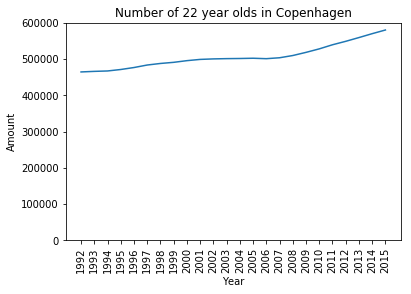

In [11]:
plt.figure()
plt.xticks(rotation=90)
plt.title("Number of 22 year olds in Copenhagen")
plt.xlabel("Year")
plt.ylabel("Amount")
plt.axis(ymin = 0, ymax=600000)
plt.plot(d.keys(), d.values())

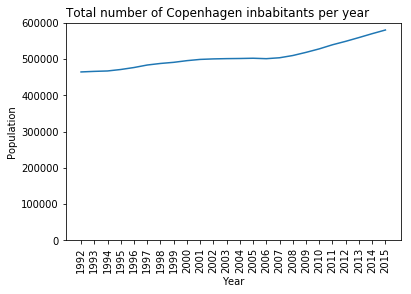

In [8]:
population_data = {str(year): lib.sum_amount(lib.by_year(data, year)) for year in np.unique(data[:, 0])}

plt.figure()
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Total number of Copenhagen inbabitants per year", loc="left")
plt.axis(ymin=0, ymax=600000)
plt.plot(population_data.keys(), population_data.values())

- - -
(7) Create illustration 2: In your notebook use your module to create a dataset where development of all German citizens can be shown over time

(-1.1500000000000001, 24.15, 0, 4174.2)

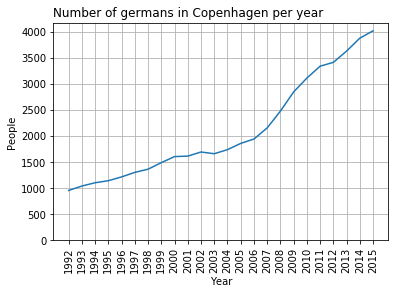

In [7]:
germans_all_time = lib.by_country(data, 5180)[::-1] # reversed

uniques  = np.unique(germans_all_time[:,0], return_index = True)[1]
ranges   = np.split(germans_all_time, uniques)[1:] # ignore first range
bar_data = {str(r[0][0]): lib.sum_amount(r) for r in ranges}

plt.figure()
plt.xticks(rotation="90")
plt.plot(bar_data.keys(), bar_data.values())
plt.title("Number of germans in Copenhagen per year", loc="left")
plt.xlabel("Year")
plt.ylabel("People")
plt.grid(True)
plt.axis(ymin=0)

- - -
(8) Create illustration 3: Show a bar plot of all the 18-25 year old in the different areas of copenhagen and in the same plot show (in a different color) all 60-67 year old in the different areas.

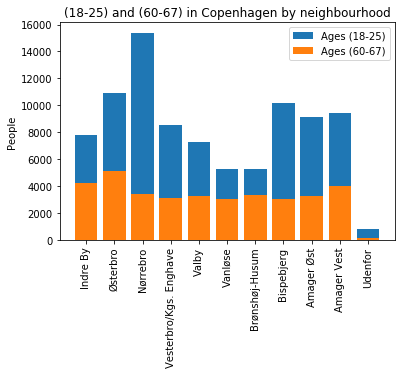

In [6]:
youth = lib.by_age_range(data_2015, 18, 26) 
elderly = lib.by_age_range(data_2015, 60, 68) # inclusive

youth_by_neighbourhood = {str(neighbourhood_names[n]): lib.sum_amount(lib.by_neighbourhood(youth, n)) for n in neighbourhood_codes}
elderly_by_neighbourhood = {str(neighbourhood_names[n]): lib.sum_amount(lib.by_neighbourhood(elderly, n)) for n in neighbourhood_codes}

plt.figure()
plt.bar(youth_by_neighbourhood.keys(), youth_by_neighbourhood.values()) # not using bottom
plt.bar(elderly_by_neighbourhood.keys(), elderly_by_neighbourhood.values())
plt.title("(18-25) and (60-67) in Copenhagen by neighbourhood")
plt.xticks(list(youth_by_neighbourhood.keys()),labels=list(neighbourhood_names.values()), rotation='vertical')
plt.ylabel("People")
plt.legend(["Ages (18-25)", "Ages (60-67)"])

- - -
(9) Create illustration 4: show a pie chart of age groups (0-10, 10-20, 20-30 ...) in Østerbro part of Copenhagen. Create another similar piechart for Vesterbro.

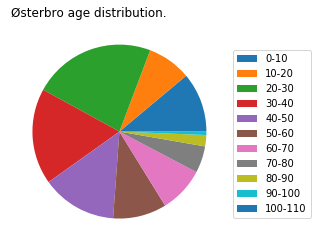

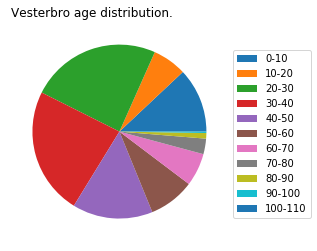

In [44]:
østerbro = lib.by_neighbourhood(data_2015, 2) 
vesterbro = lib.by_neighbourhood(data_2015, 4)

def split_age_range(table, steps):
    max_age = table[:, 2].max() + 1
    return {str(x) + '-' + str(x + steps): lib.by_age_range(table, x, x + steps)[:,4].sum() for x in range(0, max_age, steps)}
    
østerbro_ranges = split_age_range(østerbro, 10)
vesterbro_ranges = split_age_range(vesterbro, 10) 

def create_legend_labels(ranges):
    return ranges.keys()

plt.figure()
plt.title("Østerbro age distribution.", loc='left')
plt.pie(østerbro_ranges.values())
plt.legend(create_legend_labels(østerbro_ranges), bbox_to_anchor=(1.0, 0.9))

plt.figure()
plt.title("Vesterbro age distribution.", loc='left')
plt.pie(vesterbro_ranges.values())
plt.legend(create_legend_labels(vesterbro_ranges), bbox_to_anchor=(1.0, 0.9))